In [46]:
import pandas as pd

In [48]:
def graduate_processint(path):
    raw_graduate = pd.read_excel(path,sheet_name='2018_졸업생의 진로 현황(중)')
    select_col=raw_graduate[['지역', '학교명','정보공시 \n 학교코드', '졸업자.2', '(특수목적고)과학고 진학자.2','(특수목적고)외고ㆍ국제고 진학자.2']]
    select_col.columns = ['지역', '학교명', '학교코드', '졸업자', '과고', '외고']
    graduate_data=select_col.drop(0)
    graduate_data['과고']=pd.to_numeric(graduate_data['과고'])
    graduate_data['외고']=pd.to_numeric(graduate_data['외고'])
    graduate_data['졸업자']=pd.to_numeric(graduate_data['졸업자'])
    graduate_data['총합']=graduate_data['과고']+graduate_data['외고']
    
    def get_province(x):
        temp=x.split(' ')[0]
        if len(temp)!=4:
            return temp[:2]
        else:
            return temp[0]+temp[2]
    
    graduate_data['시도']=graduate_data['지역'].dropna().apply(get_province)
    graduate_data['구군']=graduate_data['지역'].dropna().apply(lambda x:x.split(' ')[1])
    
    graduate_data.at[588,'시도']='부산'
    graduate_data.at[588,'구군']='기장군'
    graduate_data.at[3011,'시도']='경북'
    graduate_data.at[3011,'시도']='예천군'
    
    return graduate_data

In [50]:
graduate_path=f'data/part1_2018년_2차_졸업생의_진로_현황(전체).xlsx'
gradu_df=graduate_processint(graduate_path)


In [51]:
gradu_df

,지역,학교명,학교코드,졸업자,과고,외고,총합,시도,구군
1,서울특별시 성북구,서울대학교사범대학부설중학교,S000003514,234.0,4.0,5.0,9.0,서울,성북구
2,서울특별시 종로구,서울대학교사범대학부설여자중학교,S000003562,172.0,0.0,8.0,8.0,서울,종로구
3,서울특별시 강남구,개원중학교,S010000698,214.0,2.0,9.0,11.0,서울,강남구
4,서울특별시 서초구,경원중학교,S010000700,310.0,5.0,4.0,9.0,서울,서초구
5,서울특별시 강남구,구룡중학교,S010000701,256.0,3.0,4.0,7.0,서울,강남구
...,...,...,...,...,...,...,...,...,...
3454,제주특별자치도 제주시,탐라중학교,S170000844,298.0,1.0,1.0,2.0,제주,제주시
3455,제주특별자치도 제주시,제주영지학교,S170000512,12.0,0.0,0.0,0.0,제주,제주시
3456,제주특별자치도 제주시,제주영송학교,S170000513,21.0,0.0,0.0,0.0,제주,제주시
3457,제주특별자치도 서귀포시,서귀포온성학교,S170000790,9.0,0.0,0.0,0.0,제주,서귀포시


In [59]:
gradu_sido=gradu_df.groupby('시도').sum()
gradu_sido.sort_values(by='총합',ascending=False)

,졸업자,과고,외고,총합
시도,,,,
경기,120572.0,361.0,2183.0,2544.0
서울,76687.0,535.0,1449.0,1984.0
부산,27044.0,230.0,767.0,997.0
인천,26046.0,181.0,559.0,740.0
경남,31481.0,195.0,342.0,537.0
대전,14988.0,100.0,261.0,361.0
충북,14831.0,51.0,203.0,254.0
대구,22842.0,98.0,153.0,251.0
울산,10759.0,76.0,165.0,241.0


In [60]:
gradu_sido['진학률']=(gradu_sido['총합']/gradu_sido['졸업자'])*100
gradu_sido.sort_values(by='진학률', ascending=False)

,졸업자,과고,외고,총합,진학률
시도,,,,,
부산,27044.0,230.0,767.0,997.0,3.686585
세종,2702.0,18.0,69.0,87.0,3.219837
인천,26046.0,181.0,559.0,740.0,2.841127
서울,76687.0,535.0,1449.0,1984.0,2.587140
대전,14988.0,100.0,261.0,361.0,2.408594
울산,10759.0,76.0,165.0,241.0,2.239985
제주,6487.0,36.0,102.0,138.0,2.127332
경기,120572.0,361.0,2183.0,2544.0,2.109943
충북,14831.0,51.0,203.0,254.0,1.712629


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

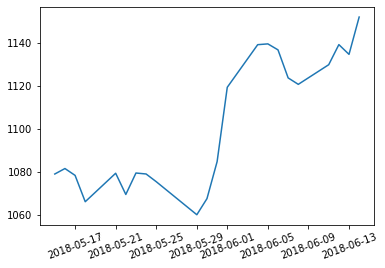

In [5]:
stock=pd.read_csv('data/part2_visual_GOOG.csv', header=None, delimiter=',')
stock.columns=['Date', 'Price']
stock['Date']=pd.to_datetime(stock['Date'],format='%d-%m-%Y')

indexed_stock=stock.set_index('Date')
ts=indexed_stock['Price']

plt.plot(ts)
plt.xticks(rotation=20)

plt.show()

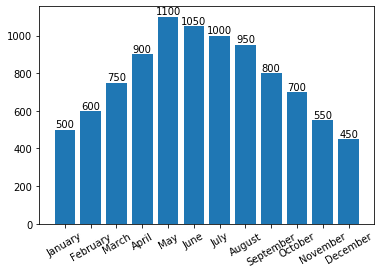

In [21]:
import numpy as np
import calendar

month_num=[1,2,3,4,5,6,7,8,9,10,11,12]
units_sold=[500, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450]

fig,ax=plt.subplots()
plt.xticks(month_num, calendar.month_name[1:13],rotation=30)

plot=ax.bar(month_num,units_sold)

for rect in plot:
    height=rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 1.002*height, '%d'%int(height), ha='center', va='bottom')

plt.show()

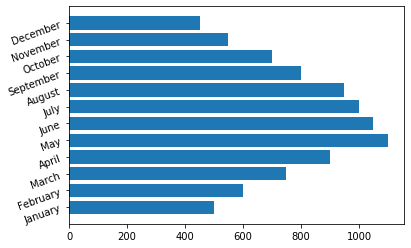

In [23]:
plt.yticks(month_num, calendar.month_name[1:13], rotation=20)
plot = plt.barh(month_num, units_sold)
plt.show();

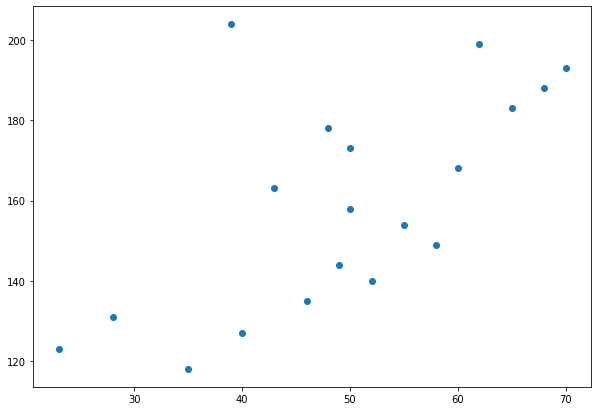

In [26]:
plt.figure(figsize=(10,7))
age_weight=pd.read_excel('data/part2_visual_scatter_ex.xlsx', 'age_weight')

x=age_weight['age']
y=age_weight['weight']

plt.scatter(x,y)
plt.show()

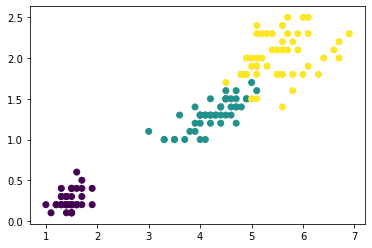

In [27]:
iris=pd.read_csv('data/part2_visual_iris_dataset.csv', delimiter=',')

iris['species']=iris['species'].map({"setosa":0, "versicolor" : 1, "virginica" : 2 })

plt.scatter(iris.petal_length, iris.petal_width, c=iris.species)
plt.show()

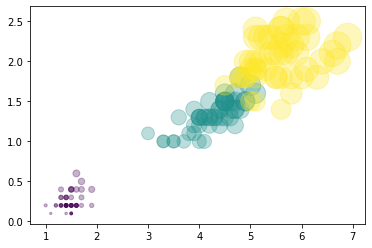

In [32]:
plt.scatter(iris.petal_length, iris.petal_width, s=50*iris.petal_length*iris.petal_width,c=iris.species, alpha=0.3
        )
plt.show()

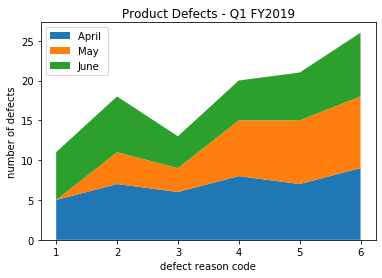

In [34]:
x = np.array([1, 2, 3, 4, 5, 6], dtype=np.int32)
Apr = [5, 7, 6, 8, 7, 9]
May = [0, 4, 3, 7, 8, 9]
June = [6, 7, 4, 5, 6, 8]

labels = ["April ", "May", "June"]

fig, ax=plt.subplots()

ax.stackplot(x,Apr,May,June,labels=labels)
ax.legend(loc=2)

plt.xlabel('defect reason code')
plt.ylabel('number of defects')
plt.title('Product Defects - Q1 FY2019')

plt.show();

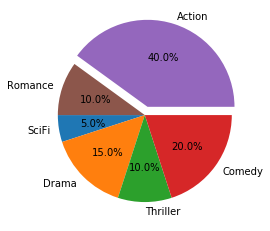

In [35]:
labels = ['SciFi', 'Drama', 'Thriller', 'Comedy', 'Action', 'Romance']
sizes = [5, 15, 10, 20, 40, 10]
explode = (0, 0, 0, 0, 0.1, 0)

fig,ax=plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=180)

plt.show()

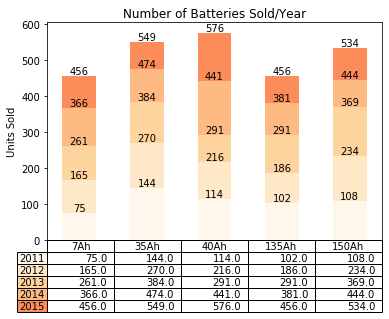

In [64]:
rows = ['2011', '2012', '2013', '2014', '2015']
columns = ('7Ah', '35Ah', '40Ah', '135Ah', '150Ah')
data = [[75, 144, 114, 102, 108],
        [90, 126, 102,  84, 126],
        [96, 114,  75, 105, 135],
        [105, 90, 150,  90,  75],
        [90,  75, 135,  75,  90]]
# values = np.arange(0, 600, 100)
n_rows = len(data)
index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

colors = plt.cm.OrRd(np.linspace(0, 0.5, len(rows)))
fig,ax=plt.subplots()
plt.ylabel("Units Sold")
plt.title('Number of Batteries Sold/Year')
plt.xticks([])

cell_text=[]

for row in range(n_rows):
    plot=plt.bar(index, data[row], bar_width,bottom=y_offset,color=colors[row])
    y_offset=y_offset+data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
    for rect in plot:
        ax.text(rect.get_x()+rect.get_width()/2, y_offset[i],'%d' % int(y_offset[i]),ha='center',va='bottom')
        i=i+1
        
the_table=plt.table(cellText=cell_text, rowLabels=rows, rowColours=colors, colLabels=columns, loc='bottom')
plt.show()
        

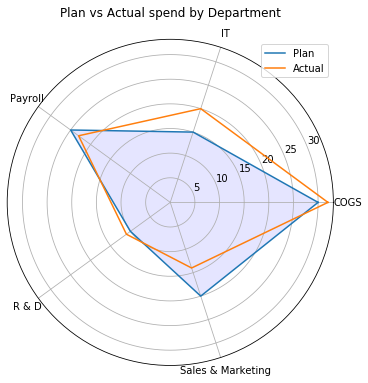

In [74]:
Depts = ["COGS","IT","Payroll","R & D", "Sales & Marketing"]

rp = [30, 15, 25, 10, 20, 30]
ra = [32, 20, 23, 11, 14, 32]

plt.figure(figsize=(10,6))
#축 주의!!!
plt.subplot(polar=True)

theta=np.linspace(0,2*np.pi, len(rp))

(lines,labels)=plt.thetagrids(range(0,360,int(360/len(Depts))), (Depts))

plt.plot(theta, rp)
#fill : 다각형 내부 채우기(alpha : 투명도)
plt.fill(theta, rp, 'b',alpha=0.1)
plt.plot(theta, ra)

plt.legend(labels=('Plan','Actual'),loc=1)
plt.title("Plan vs Actual spend by Department")
plt.show()

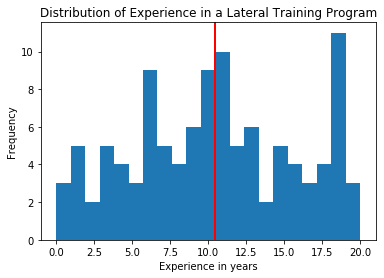

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [80]:
grp_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,  
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,  
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,  
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,  
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,  
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,  
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,  
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,  
                    15,  16,  18,  13])

nbins = 21
n, bins, patches = plt.hist(grp_exp, bins = nbins)

plt.xlabel("Experience in years")
plt.ylabel("Frequency")
plt.title("Distribution of Experience in a Lateral Training Program")

plt.axvline(x=grp_exp.mean(), linewidth=2, color = 'r') 
plt.show()

print("Mean Experience of DSS Batch: {:4.3f}".format(grp_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(grp_exp.std()))

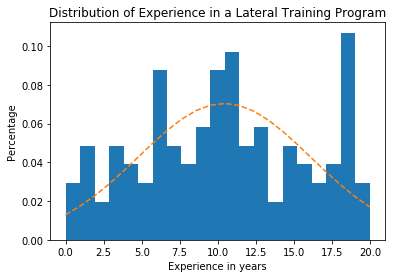

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [89]:
grp_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,  
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,  
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,  
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,  
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,  
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,  
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,  
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,  
                    15,  16,  18,  13])

nbins = 21

#위에 그래프 하나 엎어주는거
n, bins, patches = plt.hist(grp_exp, bins = nbins, density=1)

plt.xlabel("Experience in years")
plt.ylabel("Percentage")
plt.title("Distribution of Experience in a Lateral Training Program")
mu = grp_exp.mean()
sigma = grp_exp.std()

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--')
plt.show()

print("Mean Experience of DSS Batch: {:4.3f}".format(grp_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(grp_exp.std()))

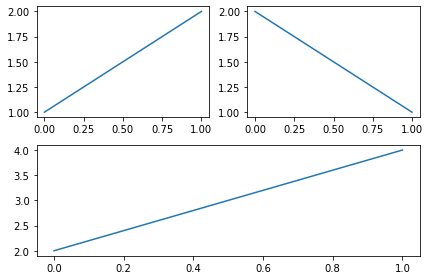

In [110]:
plt.close('all')
fig = plt.figure()

#각각 셀로판지 한장씩 얻어옴 subplot뒤에 숫자는 위치 나타냄(전체행, 전체열, 위치(인덱스))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(212) #예외다.. 이상하네 ==> 기억하자!! 혼자 1열 다 먹을 거고 인덱스 2?
# ax4 = plt.subplot(224)

ax1.plot([1,2])
ax2.plot([2,1])
ax3.plot([2,4])

plt.tight_layout()
plt.show();



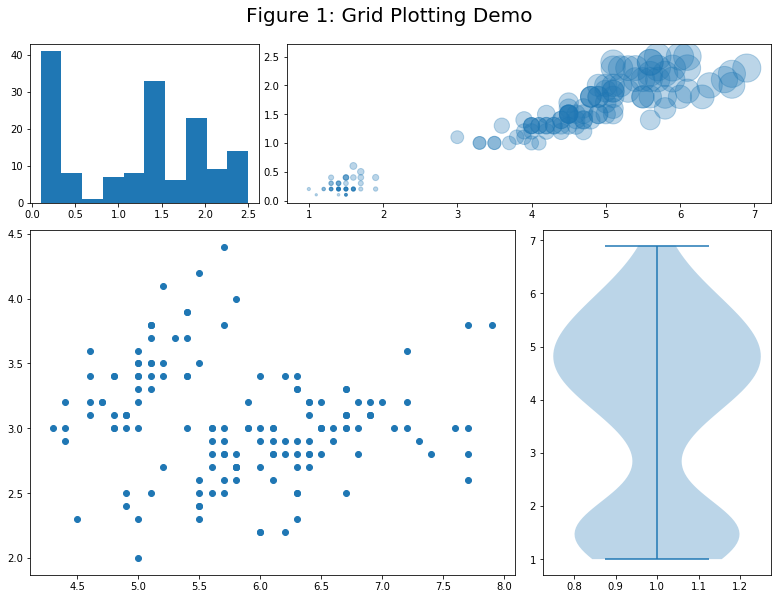

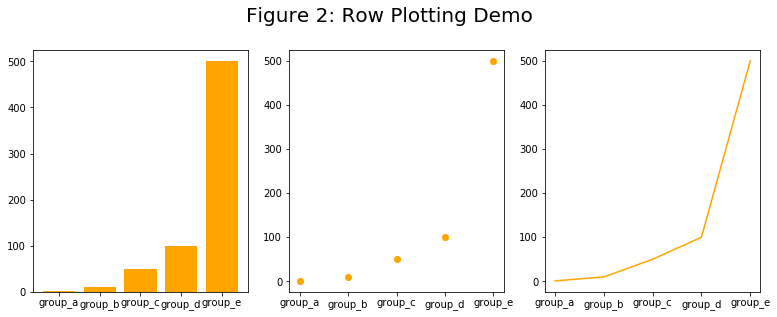

In [113]:
plt.close('all')
iris = pd.read_csv('data/part2_visual_iris_dataset.csv', delimiter=',')

fig = plt.figure(1, figsize=(12, 9))

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

ax1.hist(iris['petal_width'])
ax2.scatter(iris['petal_length'], iris['petal_width'], 
            s=50*iris['petal_length']*iris['petal_width'], alpha=0.3)
ax3.scatter(iris['sepal_length'], iris['sepal_width'])
ax4.violinplot(iris['petal_length'])

plt.suptitle('Figure 1: Grid Plotting Demo', fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)

plt.figure(2, figsize=(12, 5))

names = ['group_a', 'group_b', 'group_c', 'group_d', 'group_e']
values = [1, 10, 50, 100, 500]

plt.subplot(131)
plt.bar(names, values, color='orange')

plt.subplot(132)
plt.scatter(names, values, color='orange')

plt.subplot(133)
plt.plot(names, values, color='orange')

plt.suptitle('Figure 2: Row Plotting Demo', fontsize=20)

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)

plt.show();


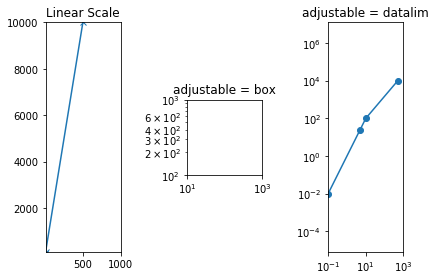

In [116]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot([0.1, 5, 10, 500], [0.01, 25, 100, 10000], "x-")
ax1.set(title="Linear Scale", xlim=(1e1, 1e3), ylim=(1e2, 1e4))

ax2.set(title="adjustable = box", xscale="log", yscale="log", xlim=(1e1, 1e3), 
        ylim=(1e2, 1e3), aspect=2)

ax3.plot([0.1, 5, 10, 500], [0.01, 25, 100, 10000], "o-")
ax3.set(title="adjustable = datalim", xscale="log", yscale="log", adjustable="datalim", 
        xlim=(1e-1, 1e3), ylim=(1e-2, 1e4), aspect=1)

plt.tight_layout()

plt.show()